In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re

# 001. Analysing Team data

In [0]:
# Input Files and creading dataframes
dfTeamReport = pd.read_csv('/content/drive/My Drive/InputFiles/KabaddiHackthonInputFiles/teamConsolidatedReport.csv')
dfTeamPoints = pd.read_csv('/content/drive/My Drive/InputFiles/KabaddiHackthonInputFiles/teamPointsStats.csv')

In [4]:
# Teams participating in Championship
dfTeamReport.Team.unique()

array(['Bengal Warriors', 'Bengaluru Bulls', 'Dabang Delhi K.C.',
       'Gujarat Fortunegiants', 'Haryana Steelers',
       'Jaipur Pink Panthers', 'Patna Pirates', 'Puneri Paltan',
       'Tamil Thalaivas', 'Telugu Titans', 'U Mumba', 'U.P. Yoddha'],
      dtype=object)

## Getting Top 3 Teams based on the points secured From Start of Season to Season 7

In [5]:
# Renaming columns
dfTeamPoints.rename(columns={'Unnamed: 0': 'Team Name'}, inplace = True)
dfTeamPoints.columns

Index(['Team Name', 'Rank', 'Plays', 'Won', 'Lost', 'Draw', 'scoreDiff',
       'Points', 'Season'],
      dtype='object')

In [6]:
# Not considering Season 7
seasons = list(dfTeamPoints.Season.unique())
seasons.remove('season 7')
seasons

['season 6', 'season 5', 'season 4', 'season 3', 'season 2', 'season 1']

In [7]:
# Creating the Dataframe 
dfTop3Contenders = pd.DataFrame()
pd.set_option('display.max_columns', 500)
for season in seasons:
  print(dfTeamPoints.loc[dfTeamPoints['Season'] == season].sort_values(by = 'Points', ascending = False).head(4))
  dfTop3Contenders = pd.concat([dfTop3Contenders, dfTeamPoints.loc[dfTeamPoints['Season'] == season].sort_values(by = 'Points', ascending = False).head(4)])

                Team Name  Rank  Plays  Won  Lost  Draw  scoreDiff  Points  \
12  Gujarat Fortunegiants     1     22   17     3     2        117      93   
13                U Mumba     2     22   15     5     2        189      86   
18        Bengaluru Bulls     1     22   13     7     2        104      78   
19        Bengal Warriors     2     22   12     8     2          2      69   

      Season  
12  season 6  
13  season 6  
18  season 6  
19  season 6  
                Team Name  Rank  Plays  Won  Lost  Draw  scoreDiff  Points  \
24  Gujarat Fortunegiants     1     22   15     4     3        126      87   
25          Puneri Paltan     2     22   15     7     0         91      80   
26       Haryana Steelers     3     22   13     5     4         40      79   
30        Bengal Warriors     1     22   11     5     6         19      77   

      Season  
24  season 5  
25  season 5  
26  season 5  
30  season 5  
               Team Name  Rank  Plays  Won  Lost  Draw  scoreDiff  P

In [8]:
# Checking how many times different Teams reaching Top-4 positions in all seasons
# Last 6 seasons data
dfTop3Contenders['Team Name'].value_counts()

U Mumba                  4
Patna Pirates            4
Bengal Warriors          3
Bengaluru Bulls          3
Puneri Paltan            3
Jaipur Pink Panthers     2
Gujarat Fortunegiants    2
Telugu Titans            2
Haryana Steelers         1
Name: Team Name, dtype: int64

## Looking at the above statistics
1. U Mumba and Patna Pirates secured 4 time to stand in the Top-4 players of seasons
2. whereas Bengal Warriors, Bengaluru Bulls and Puneri Paltan reached Top-4 positions 3 times in all seasons.
3. Though there are some teams not played all seasons and joined recently the championship

Text(0.5, 1.0, 'Top 4 Contenders in each season so far based on the points')

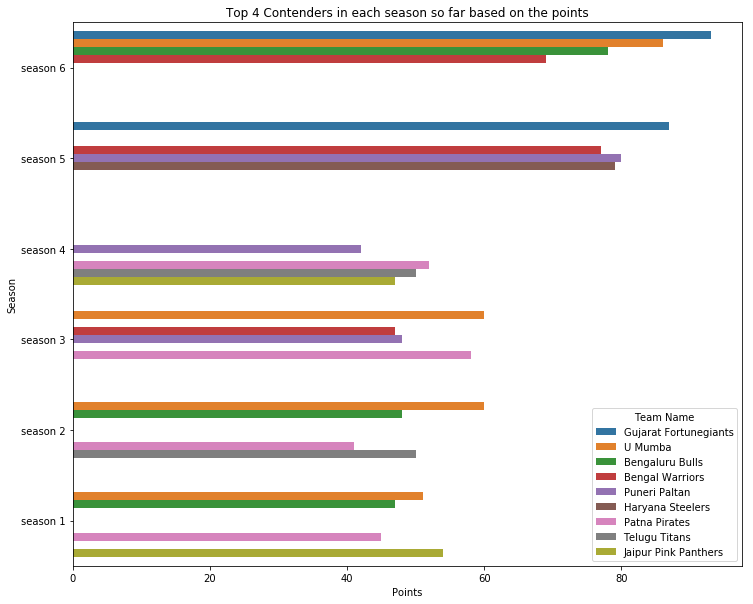

In [9]:
plt.figure(figsize = (12,10))
sns.barplot(x = 'Points', y='Season', hue = 'Team Name', data = dfTop3Contenders)
plt.title('Top 4 Contenders in each season so far based on the points')

## Looking at above statistics
1. Above statistics are not showing consistent patterns; where any one of the team maintaining victory position.
2. Looking at Season 6 - Chances are Gujarat Fortunegiants or Bengal Warriors, Puneri Paltan or Bengaal Warriors are having high chances of winning Season - 7 Too.


## Considering Season 7 Points too.

In [10]:
dfTeamPoints.head()

,Team Name,Rank,Plays,Won,Lost,Draw,scoreDiff,Points,Season
0,Dabang Delhi K.C.,1,18,14,2,2,72,77,season 7
1,Bengal Warriors,2,19,12,4,3,86,73,season 7
2,Haryana Steelers,3,17,11,5,1,30,59,season 7
3,U Mumba,4,17,9,7,1,35,53,season 7
4,Bengaluru Bulls,5,18,9,8,1,10,53,season 7


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

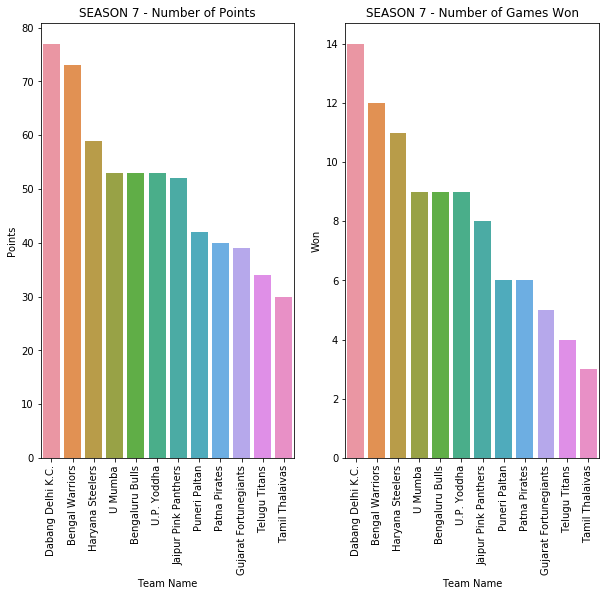

In [11]:
# Season 7 Points distribution so far in the games
dfTeamPoints.loc[dfTeamPoints['Season'] == 'season 7'].sort_values(by = 'Points', ascending = False)
plt.figure(1)
plt.figure(figsize = (10, 8))

ax = plt.subplot(121)
sns.barplot(x = 'Team Name', y = 'Points', data = dfTeamPoints.loc[dfTeamPoints['Season'] == 'season 7'].sort_values(by = 'Points', ascending = False))
plt.title('SEASON 7 - Number of Points')
plt.xticks(rotation = 90)

ax = plt.subplot(122)
sns.barplot(x = 'Team Name', y = 'Won', data = dfTeamPoints.loc[dfTeamPoints['Season'] == 'season 7'].sort_values(by = 'Won', ascending = False))
plt.title('SEASON 7 - Number of Games Won')
plt.xticks(rotation = 90)

## But looking at the above data
1. Dabang Delhi K,C ,Bengal Warriors, Haryana Steelers or U-mumba are top 4 contenderes for Season 7 champion.
2. Out of all, Dabang Delhi KC and Bengal Warriors are going head-to-head.
3. Chances are one of the above teams will get the Season 7 Championship.

# Comparing multiple Kabaddi parameters to guess the winner amont Top 4 teams of SEASON-7
## Working with Team-Statistics

In [12]:
dfTeamReport.rename(columns={'Unnamed: 0': 'Parameter'}, inplace = True)
dfTeamReport.head()

,Parameter,OVERALL,SEASON 1,SEASON 2,SEASON 3,SEASON 4,SEASON 5,SEASON 6,SEASON 7,Team
0,MATCHES PLAYED,124,14,14,16,14,24,23,19,Bengal Warriors
1,WINS,55,4,4,9,3,11,12,12,Bengal Warriors
2,DRAWS,15,1,1,0,2,6,2,3,Bengal Warriors
3,LOSSES,54,9,9,7,9,7,9,4,Bengal Warriors
4,FINISHING POSITION,-,7,6,4,8,1,2,1,Bengal Warriors


In [13]:
# Different Parameters to compare the Team Performance
dfTeamReport['Parameter'].unique()

array(['MATCHES PLAYED', 'WINS', 'DRAWS', 'LOSSES', 'FINISHING POSITION',
       'TOTAL RAIDS', 'SUCCESSFUL RAIDS', 'UNSUCCESSFUL RAID',
       'EMPTY RAIDS', 'SUCCESS RAID %', 'NO. OF SUPER RAIDS',
       'RAID TOUCH POINTS', 'RAID BONUS POINTS', 'TOTAL RAID POINTS',
       'TOTAL TACKLES', 'SUCCESSFUL TACKLES', 'UNSUCCESFUL TACKLES',
       'SUCCESSFUL TACKLE %', 'NO. OF SUPER TACKLES',
       'ALL OUTS INFLICTED', 'TOTAL ALL OUT POINTS',
       'TOTAL DEFENCE POINTS'], dtype=object)

In [14]:
# Checking and Managing - data cleaning process
dfTeamReport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
Parameter    264 non-null object
OVERALL      264 non-null object
SEASON 1     176 non-null object
SEASON 2     176 non-null object
SEASON 3     176 non-null object
SEASON 4     176 non-null object
SEASON 5     264 non-null object
SEASON 6     264 non-null object
SEASON 7     264 non-null object
Team         264 non-null object
dtypes: object(10)
memory usage: 20.7+ KB


In [0]:
# Correcting Missing Values
dfTeamReport.fillna(0, inplace = True)

In [16]:
dfTeamReport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
Parameter    264 non-null object
OVERALL      264 non-null object
SEASON 1     264 non-null object
SEASON 2     264 non-null object
SEASON 3     264 non-null object
SEASON 4     264 non-null object
SEASON 5     264 non-null object
SEASON 6     264 non-null object
SEASON 7     264 non-null object
Team         264 non-null object
dtypes: object(10)
memory usage: 20.7+ KB


In [0]:
# Replacing '-' value with 0
dfTeamReport.loc[dfTeamReport.OVERALL == '-', 'OVERALL'] = 0

### Imputing '-' and '%' symbols from the data

In [0]:
num_cols = ['OVERALL',	'SEASON 1', 'SEASON 2',	'SEASON 3',	'SEASON 4',	'SEASON 5',	'SEASON 6', 'SEASON 7']
for col in num_cols:
  dfTeamReport.loc[dfTeamReport['Parameter'] == 'SUCCESS RAID %', col] = dfTeamReport.loc[dfTeamReport['Parameter'] == 'SUCCESS RAID %'][col].apply(lambda x : list(re.match(r'([0-9]+)', str(x)).groups(1))[0])


In [0]:
for col in num_cols:
  dfTeamReport.loc[dfTeamReport['Parameter'] == 'SUCCESSFUL TACKLE %', col] = dfTeamReport.loc[dfTeamReport['Parameter'] == 'SUCCESSFUL TACKLE %'][col].apply(lambda x : list(re.match(r'([0-9]+)', str(x)).groups(1))[0])

In [20]:
dfTeamReport.head()

,Parameter,OVERALL,SEASON 1,SEASON 2,SEASON 3,SEASON 4,SEASON 5,SEASON 6,SEASON 7,Team
0,MATCHES PLAYED,124,14,14,16,14,24,23,19,Bengal Warriors
1,WINS,55,4,4,9,3,11,12,12,Bengal Warriors
2,DRAWS,15,1,1,0,2,6,2,3,Bengal Warriors
3,LOSSES,54,9,9,7,9,7,9,4,Bengal Warriors
4,FINISHING POSITION,0,7,6,4,8,1,2,1,Bengal Warriors


In [0]:
# Changing the datatypes for correct data handling
num_cols = ['OVERALL',	'SEASON 1', 'SEASON 2',	'SEASON 3',	'SEASON 4',	'SEASON 5',	'SEASON 6', 'SEASON 7']
for col in num_cols:
  dfTeamReport[col] = dfTeamReport[col].astype('int32')

In [22]:
# Final Dataframe composition
dfTeamReport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
Parameter    264 non-null object
OVERALL      264 non-null int32
SEASON 1     264 non-null int32
SEASON 2     264 non-null int32
SEASON 3     264 non-null int32
SEASON 4     264 non-null int32
SEASON 5     264 non-null int32
SEASON 6     264 non-null int32
SEASON 7     264 non-null int32
Team         264 non-null object
dtypes: int32(8), object(2)
memory usage: 12.5+ KB


In [23]:
# Checking 'Successful Raids" for different teams
dfSuccssRides = dfTeamReport.loc[dfTeamReport.Parameter == 'SUCCESSFUL RAIDS']
dfSuccssRides

,Parameter,OVERALL,SEASON 1,SEASON 2,SEASON 3,SEASON 4,SEASON 5,SEASON 6,SEASON 7,Team
6,SUCCESSFUL RAIDS,1764,213,134,213,167,379,340,318,Bengal Warriors
28,SUCCESSFUL RAIDS,1795,225,194,158,157,336,431,294,Bengaluru Bulls
50,SUCCESSFUL RAIDS,1734,246,159,171,162,283,401,312,Dabang Delhi K.C.
72,SUCCESSFUL RAIDS,953,0,0,0,0,335,392,226,Gujarat Fortunegiants
94,SUCCESSFUL RAIDS,947,0,0,0,0,327,361,259,Haryana Steelers
116,SUCCESSFUL RAIDS,1669,270,183,149,203,288,334,242,Jaipur Pink Panthers
138,SUCCESSFUL RAIDS,2066,253,182,241,206,487,406,291,Patna Pirates
160,SUCCESSFUL RAIDS,1669,204,170,203,230,304,286,272,Puneri Paltan
182,SUCCESSFUL RAIDS,943,0,0,0,0,351,344,248,Tamil Thalaivas
204,SUCCESSFUL RAIDS,1820,272,265,206,206,332,289,250,Telugu Titans


### Checking for Successful Rides in Overall in all seasons

Text(0.5, 1.0, 'SUCCESSFULL RIDES OVERALL in ALL SEASONS')

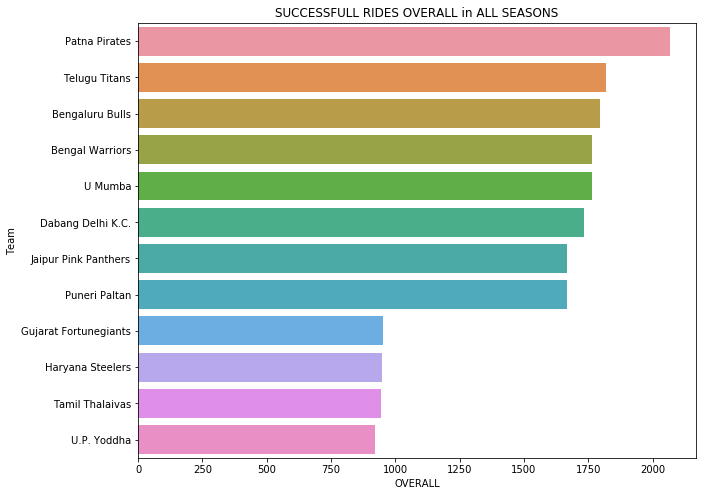

In [24]:
plt.figure(figsize=(10,8))
sns.barplot(y = 'Team', x = 'OVERALL', data = dfSuccssRides.sort_values(by = 'OVERALL', ascending= False))
plt.title('SUCCESSFULL RIDES OVERALL in ALL SEASONS')

In [0]:
# user defined function calls
def plotForGivenParameter_and_season(paramOf_Interest, season = 'OVERALL'):
  ## Function Call for passing 'PARAMETER' name and to wok on the plot
  dfparamOfIntrst = dfTeamReport.loc[dfTeamReport.Parameter == paramOf_Interest]
  sns.barplot(y = 'Team', x = season, data = dfparamOfIntrst.sort_values(by = season, ascending= False))
  plt.title('PLOT FOR - "{}" FOR "{}"'.format(paramOf_Interest, season))

In [0]:
def linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName, paramOfIntrst, colorPlot = 'b+' ):
  seasonCols = list(dfTeamReport.columns)
  seasonCols =  [ s for s in seasonCols if 'SEASON' in s]

  dfTeamOfIntrst = dfTeamReport.loc[(dfTeamReport.Team == teamName) & (dfTeamReport.Parameter ==  paramOfIntrst)][seasonCols]

  plt.plot(seasonCols, dfTeamOfIntrst.T[list(dfTeamOfIntrst.index)[0]], label = teamName)

  plt.xticks(rotation = 90)
  plt.legend()


### Checking for successful Rides in all teams in all seasons

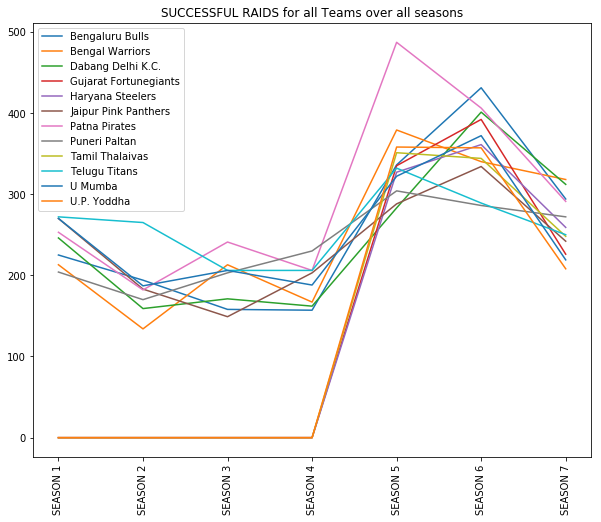

In [27]:
plt.figure(figsize = (10, 8))
plt.title('SUCCESSFUL RAIDS for all Teams over all seasons')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengaluru Bulls', paramOfIntrst = 'SUCCESSFUL RAIDS' )
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengal Warriors', paramOfIntrst = 'SUCCESSFUL RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Dabang Delhi K.C.', paramOfIntrst = 'SUCCESSFUL RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Gujarat Fortunegiants', paramOfIntrst = 'SUCCESSFUL RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Haryana Steelers', paramOfIntrst = 'SUCCESSFUL RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Jaipur Pink Panthers', paramOfIntrst = 'SUCCESSFUL RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Patna Pirates', paramOfIntrst = 'SUCCESSFUL RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Puneri Paltan', paramOfIntrst = 'SUCCESSFUL RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Tamil Thalaivas', paramOfIntrst = 'SUCCESSFUL RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Telugu Titans', paramOfIntrst = 'SUCCESSFUL RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U Mumba', paramOfIntrst = 'SUCCESSFUL RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U.P. Yoddha', paramOfIntrst = 'SUCCESSFUL RAIDS')

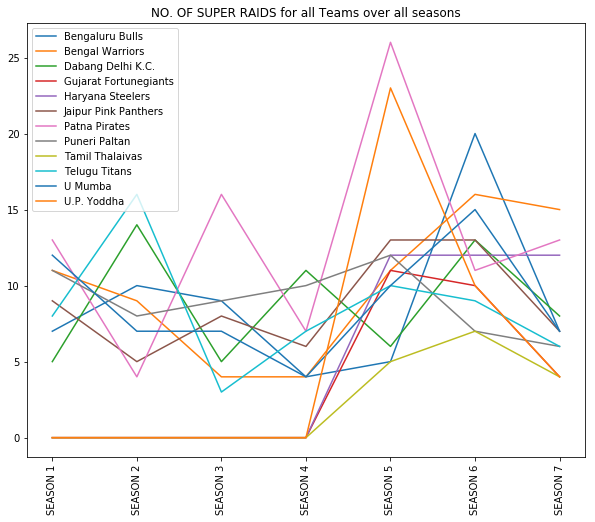

In [28]:
plt.figure(figsize = (10, 8))
plt.title('NO. OF SUPER RAIDS for all Teams over all seasons')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengaluru Bulls', paramOfIntrst = 'NO. OF SUPER RAIDS' )
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengal Warriors', paramOfIntrst = 'NO. OF SUPER RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Dabang Delhi K.C.', paramOfIntrst = 'NO. OF SUPER RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Gujarat Fortunegiants', paramOfIntrst = 'NO. OF SUPER RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Haryana Steelers', paramOfIntrst = 'NO. OF SUPER RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Jaipur Pink Panthers', paramOfIntrst = 'NO. OF SUPER RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Patna Pirates', paramOfIntrst = 'NO. OF SUPER RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Puneri Paltan', paramOfIntrst = 'NO. OF SUPER RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Tamil Thalaivas', paramOfIntrst = 'NO. OF SUPER RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Telugu Titans', paramOfIntrst = 'NO. OF SUPER RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U Mumba', paramOfIntrst = 'NO. OF SUPER RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U.P. Yoddha', paramOfIntrst = 'NO. OF SUPER RAIDS')

### Similarly, checking for Super Tackles

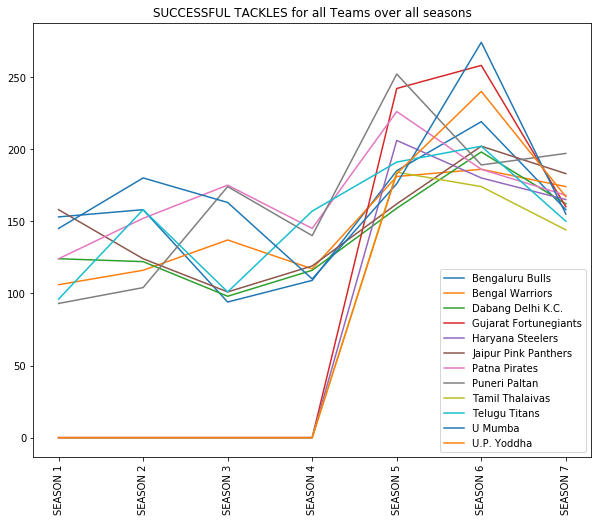

In [29]:
plt.figure(figsize = (10, 8))
plt.title('SUCCESSFUL TACKLES for all Teams over all seasons')

linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengaluru Bulls', paramOfIntrst = 'SUCCESSFUL TACKLES' )
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengal Warriors', paramOfIntrst = 'SUCCESSFUL TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Dabang Delhi K.C.', paramOfIntrst = 'SUCCESSFUL TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Gujarat Fortunegiants', paramOfIntrst = 'SUCCESSFUL TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Haryana Steelers', paramOfIntrst = 'SUCCESSFUL TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Jaipur Pink Panthers', paramOfIntrst = 'SUCCESSFUL TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Patna Pirates', paramOfIntrst = 'SUCCESSFUL TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Puneri Paltan', paramOfIntrst = 'SUCCESSFUL TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Tamil Thalaivas', paramOfIntrst = 'SUCCESSFUL TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Telugu Titans', paramOfIntrst = 'SUCCESSFUL TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U Mumba', paramOfIntrst = 'SUCCESSFUL TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U.P. Yoddha', paramOfIntrst = 'SUCCESSFUL TACKLES')

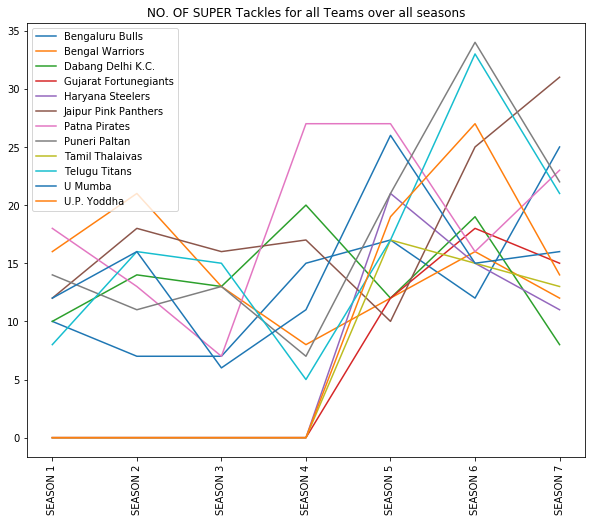

In [30]:
plt.figure(figsize = (10, 8))
plt.title('NO. OF SUPER Tackles for all Teams over all seasons')

linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengaluru Bulls', paramOfIntrst = 'NO. OF SUPER TACKLES' )
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengal Warriors', paramOfIntrst = 'NO. OF SUPER TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Dabang Delhi K.C.', paramOfIntrst = 'NO. OF SUPER TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Gujarat Fortunegiants', paramOfIntrst = 'NO. OF SUPER TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Haryana Steelers', paramOfIntrst = 'NO. OF SUPER TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Jaipur Pink Panthers', paramOfIntrst = 'NO. OF SUPER TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Patna Pirates', paramOfIntrst = 'NO. OF SUPER TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Puneri Paltan', paramOfIntrst = 'NO. OF SUPER TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Tamil Thalaivas', paramOfIntrst = 'NO. OF SUPER TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Telugu Titans', paramOfIntrst = 'NO. OF SUPER TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U Mumba', paramOfIntrst = 'NO. OF SUPER TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U.P. Yoddha', paramOfIntrst = 'NO. OF SUPER TACKLES')

### Checking for All Outs Inflicted Parameter for all Teams over all Seasons

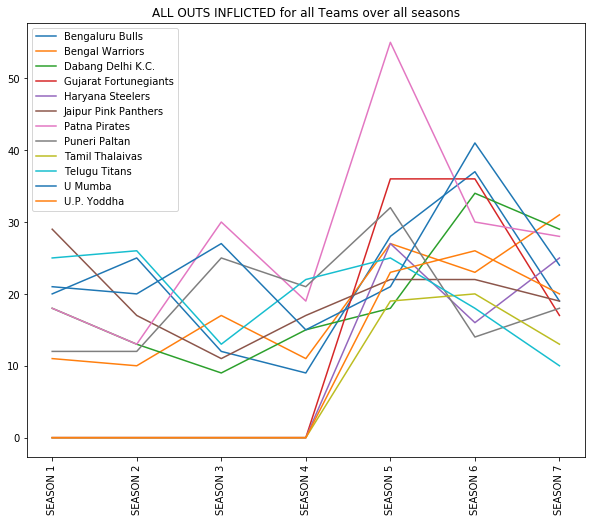

In [31]:
plt.figure(figsize = (10, 8))
plt.title('ALL OUTS INFLICTED for all Teams over all seasons')

linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengaluru Bulls', paramOfIntrst = 'ALL OUTS INFLICTED' )
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengal Warriors', paramOfIntrst = 'ALL OUTS INFLICTED')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Dabang Delhi K.C.', paramOfIntrst = 'ALL OUTS INFLICTED')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Gujarat Fortunegiants', paramOfIntrst = 'ALL OUTS INFLICTED')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Haryana Steelers', paramOfIntrst = 'ALL OUTS INFLICTED')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Jaipur Pink Panthers', paramOfIntrst = 'ALL OUTS INFLICTED')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Patna Pirates', paramOfIntrst = 'ALL OUTS INFLICTED')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Puneri Paltan', paramOfIntrst = 'ALL OUTS INFLICTED')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Tamil Thalaivas', paramOfIntrst = 'ALL OUTS INFLICTED')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Telugu Titans', paramOfIntrst = 'ALL OUTS INFLICTED')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U Mumba', paramOfIntrst = 'ALL OUTS INFLICTED')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U.P. Yoddha', paramOfIntrst = 'ALL OUTS INFLICTED')

## Looking at the above plots, 
**1. It is not easy to compare the best performance parameter**

***2. so, comparing Only Season 4 - Top Contenders to see who gonna win the championship***

## Comparing Season 7 - Top 4 Contenders parameters

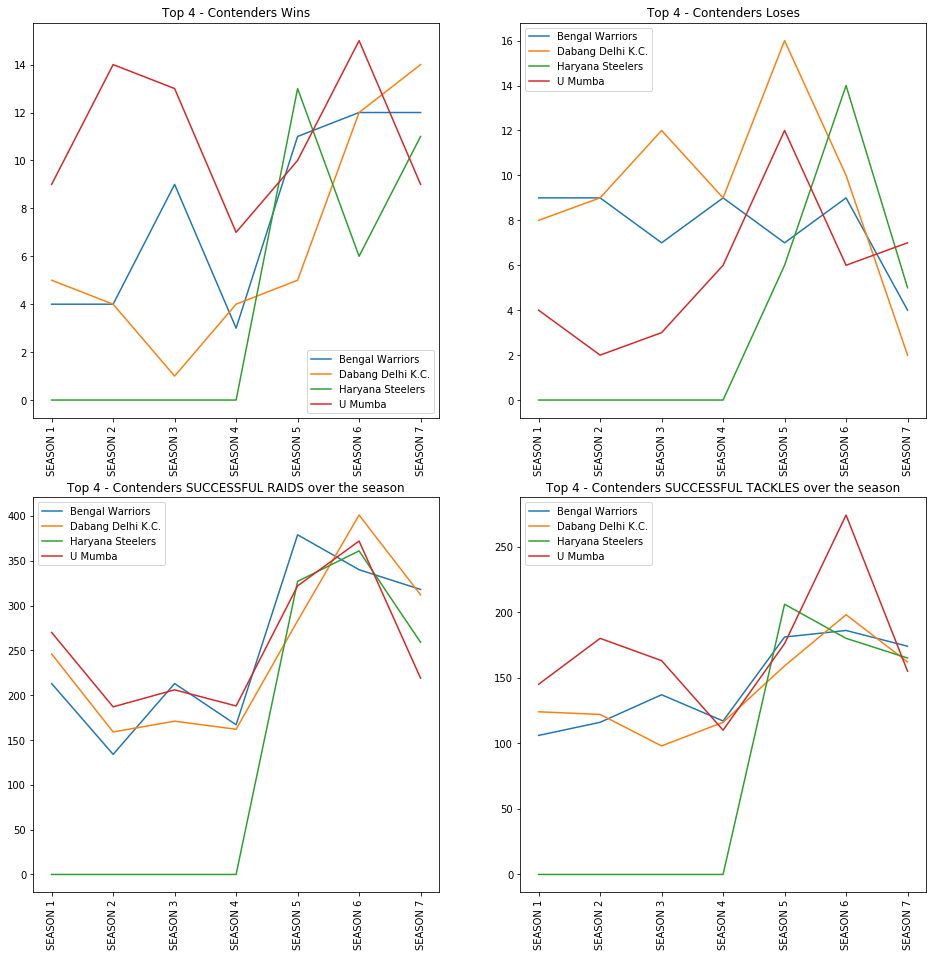

In [32]:
plt.figure(figsize = (16,16))
plt.figure(1)

ax = plt.subplot(221)
plt.title('Top 4 - Contenders Wins')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengal Warriors', paramOfIntrst = 'WINS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Dabang Delhi K.C.', paramOfIntrst = 'WINS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Haryana Steelers', paramOfIntrst = 'WINS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U Mumba', paramOfIntrst = 'WINS')

ax = plt.subplot(222)
plt.title('Top 4 - Contenders Loses')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengal Warriors', paramOfIntrst = 'LOSSES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Dabang Delhi K.C.', paramOfIntrst = 'LOSSES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Haryana Steelers', paramOfIntrst = 'LOSSES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U Mumba', paramOfIntrst = 'LOSSES')

ax = plt.subplot(223)
plt.title('Top 4 - Contenders SUCCESSFUL RAIDS over the season')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengal Warriors', paramOfIntrst = 'SUCCESSFUL RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Dabang Delhi K.C.', paramOfIntrst = 'SUCCESSFUL RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Haryana Steelers', paramOfIntrst = 'SUCCESSFUL RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U Mumba', paramOfIntrst = 'SUCCESSFUL RAIDS')

ax = plt.subplot(224)
plt.title('Top 4 - Contenders SUCCESSFUL TACKLES over the season')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengal Warriors', paramOfIntrst = 'SUCCESSFUL TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Dabang Delhi K.C.', paramOfIntrst = 'SUCCESSFUL TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Haryana Steelers', paramOfIntrst = 'SUCCESSFUL TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U Mumba', paramOfIntrst = 'SUCCESSFUL TACKLES')


## Looking at the above plots
1. Dabang Delhi KC, consistently showing improvement in number of Wins
2. Similarly, Bengal Warriors too, maintaining a good number of wins in Season 7, and followed by Haryana Steelers and then U Mumba
3. Whereas in category of Successful Raids, Bengal Warriors is leading in Season 7, followed in very slight margin by Dabang Delhi KC and then Haryana Steelers and then U Mumba
4. U Mumba considered to be the best the Tacklers in Season 6; but in season 7, they plummeted down to lowest compared in between Top 4 contenders
5. All team are maintaining a slight margins of difference in area of Successful Tackles; starting with Bengal Warriors in first place, then Harayana Steelers, Dabanga Delhi KC and last is U Mumba 

## Comparing Successful Rides with Successful Tackles

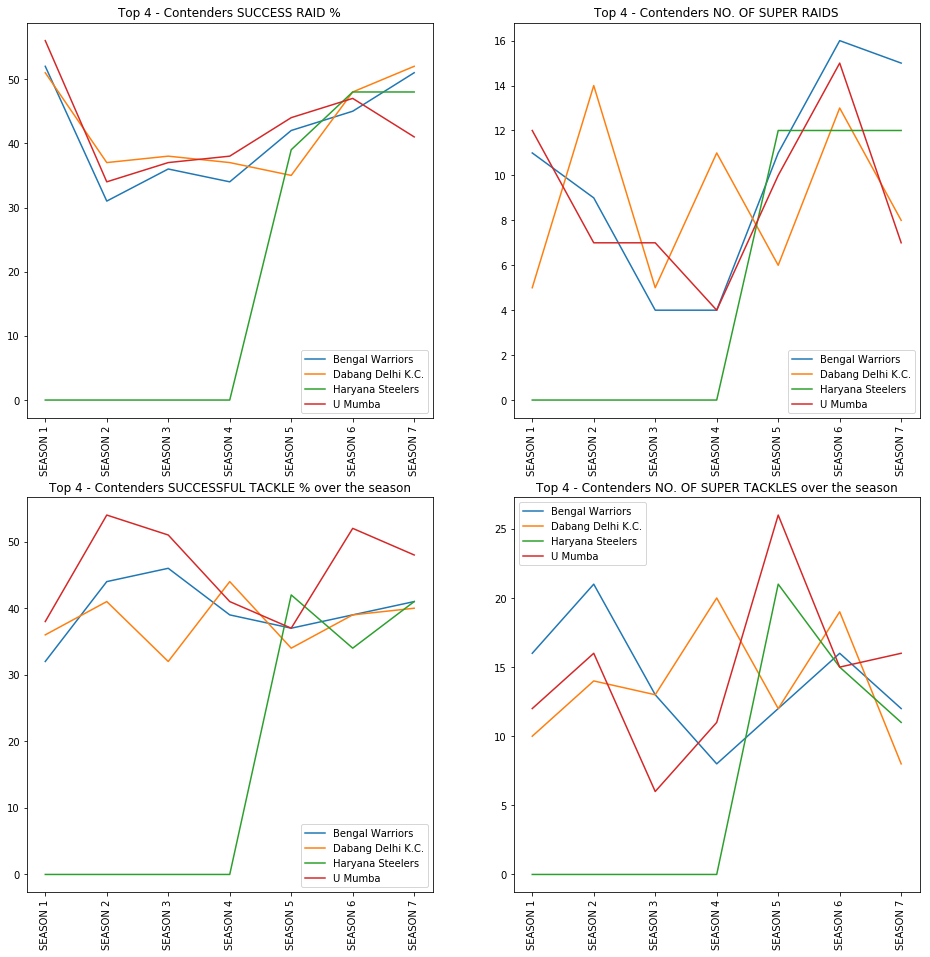

In [33]:
plt.figure(figsize = (16,16))
plt.figure(1)

ax = plt.subplot(221)
plt.title('Top 4 - Contenders SUCCESS RAID %')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengal Warriors', paramOfIntrst = 'SUCCESS RAID %')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Dabang Delhi K.C.', paramOfIntrst = 'SUCCESS RAID %')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Haryana Steelers', paramOfIntrst = 'SUCCESS RAID %')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U Mumba', paramOfIntrst = 'SUCCESS RAID %')

ax = plt.subplot(222)
plt.title('Top 4 - Contenders NO. OF SUPER RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengal Warriors', paramOfIntrst = 'NO. OF SUPER RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Dabang Delhi K.C.', paramOfIntrst = 'NO. OF SUPER RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Haryana Steelers', paramOfIntrst = 'NO. OF SUPER RAIDS')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U Mumba', paramOfIntrst = 'NO. OF SUPER RAIDS')

ax = plt.subplot(223)
plt.title('Top 4 - Contenders SUCCESSFUL TACKLE % over the season')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengal Warriors', paramOfIntrst = 'SUCCESSFUL TACKLE %')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Dabang Delhi K.C.', paramOfIntrst = 'SUCCESSFUL TACKLE %')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Haryana Steelers', paramOfIntrst = 'SUCCESSFUL TACKLE %')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U Mumba', paramOfIntrst = 'SUCCESSFUL TACKLE %')

ax = plt.subplot(224)
plt.title('Top 4 - Contenders NO. OF SUPER TACKLES over the season')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengal Warriors', paramOfIntrst = 'NO. OF SUPER TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Dabang Delhi K.C.', paramOfIntrst = 'NO. OF SUPER TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Haryana Steelers', paramOfIntrst = 'NO. OF SUPER TACKLES')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U Mumba', paramOfIntrst = 'NO. OF SUPER TACKLES')


## Looking at the above plots
1. Dabang Delhi having less number of Super Successful Raids numerically, but, they have maximum number of Successful Ride %; that means they are getting most of rides as successful ones.
2. Whereas Bengal Warriors maintaing steady Successful Ride % and No Sucessful Rides too.
3. Whereas Haryana Steelers, recently joined the championship and proving to be strong contender in-terms of Success raides
4. U Mumba seems to be very strong contender in Tackle percentage and Successful Tackle Percentage too.

# Task 3: Predict the team with the highest points for successful raids.


## Successful Rides comparision

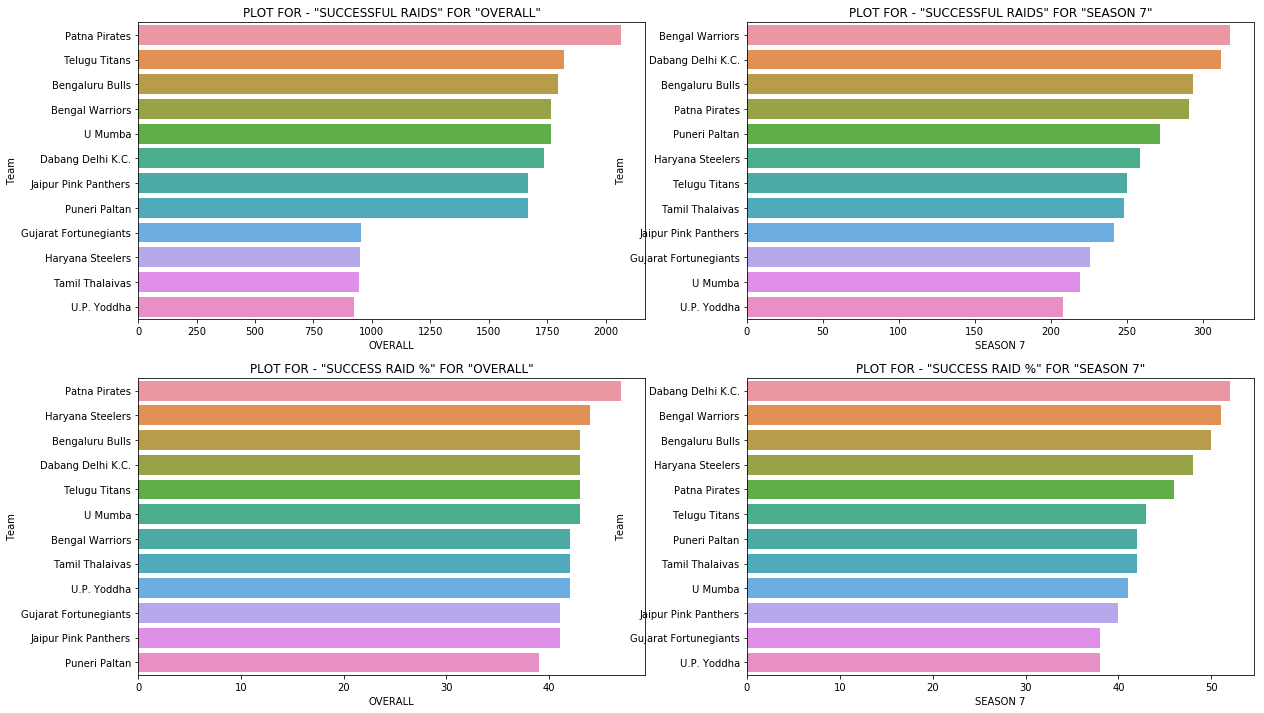

In [34]:
# Rides Comparision
plt.figure(figsize = (20, 12))
plt.figure(1)

ax = plt.subplot(221)
plotForGivenParameter_and_season(paramOf_Interest = 'SUCCESSFUL RAIDS', season = 'OVERALL')
ax = plt.subplot(222)
plotForGivenParameter_and_season(paramOf_Interest = 'SUCCESSFUL RAIDS', season = 'SEASON 7')

ax = plt.subplot(223)
plotForGivenParameter_and_season(paramOf_Interest = 'SUCCESS RAID %', season = 'OVERALL')
ax = plt.subplot(224)
plotForGivenParameter_and_season(paramOf_Interest = 'SUCCESS RAID %', season = 'SEASON 7')

## Checking for Successful Rides % from last 4 seasons


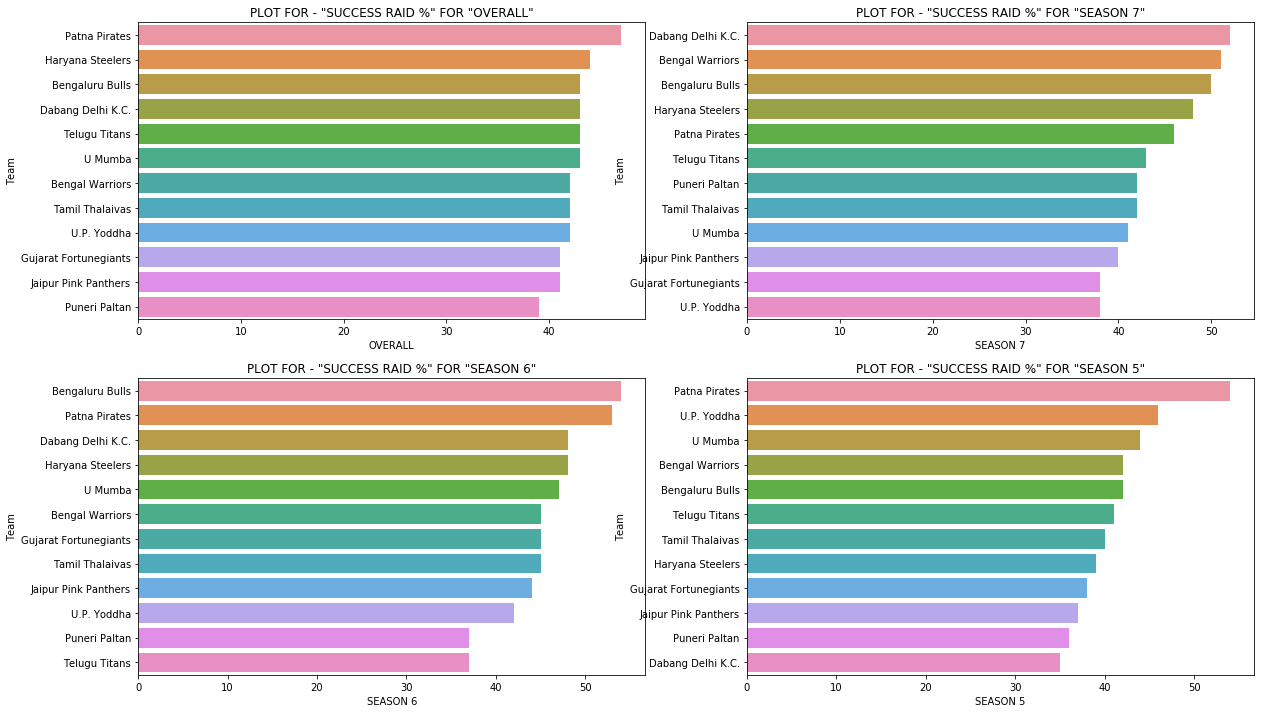

In [35]:
#SUCCESS RAID % Comparision
plt.figure(figsize = (20, 12))
plt.figure(1)

ax = plt.subplot(221)
plotForGivenParameter_and_season(paramOf_Interest = 'SUCCESS RAID %', season = 'OVERALL')
ax = plt.subplot(222)
plotForGivenParameter_and_season(paramOf_Interest = 'SUCCESS RAID %', season = 'SEASON 7')
ax = plt.subplot(223)
plotForGivenParameter_and_season(paramOf_Interest = 'SUCCESS RAID %', season = 'SEASON 6')
ax = plt.subplot(224)
plotForGivenParameter_and_season(paramOf_Interest = 'SUCCESS RAID %', season = 'SEASON 5')

# Task 4: Predict the team with the highest points for successful tackles.

### Successful Tackle parameter Comparision

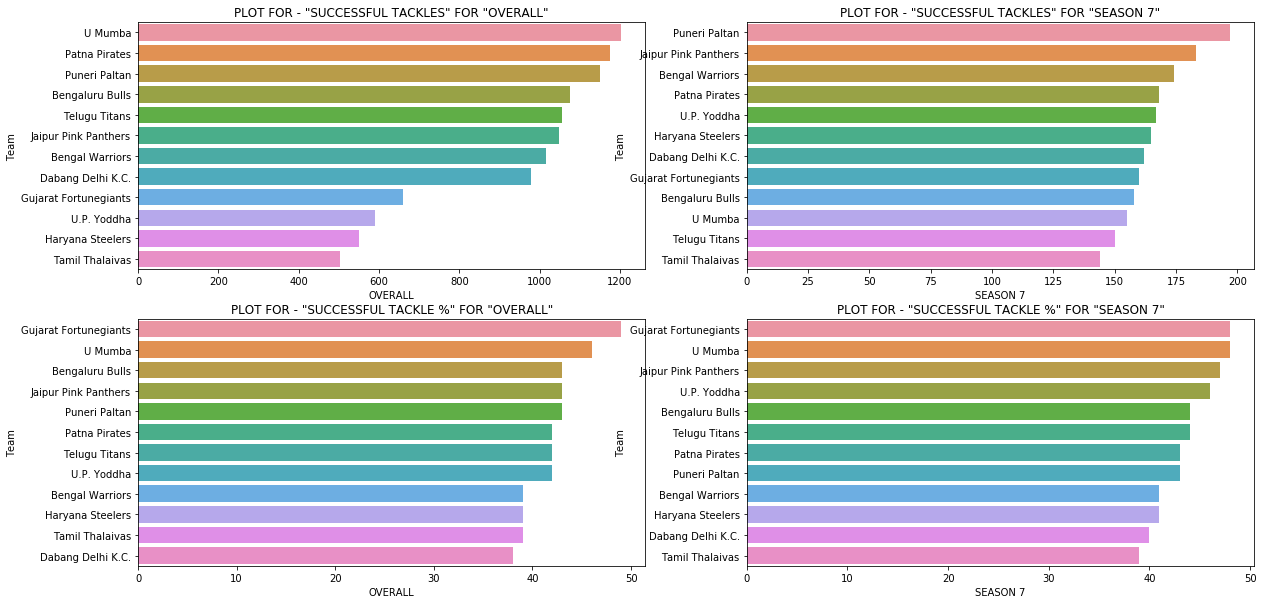

In [36]:
# Rides Comparision
plt.figure(figsize = (20,10))
plt.figure(1)

ax = plt.subplot(221)
plotForGivenParameter_and_season(paramOf_Interest = 'SUCCESSFUL TACKLES', season = 'OVERALL')
ax = plt.subplot(222)
plotForGivenParameter_and_season(paramOf_Interest = 'SUCCESSFUL TACKLES', season = 'SEASON 7')

ax = plt.subplot(223)
plotForGivenParameter_and_season(paramOf_Interest = 'SUCCESSFUL TACKLE %', season = 'OVERALL')
ax = plt.subplot(224)
plotForGivenParameter_and_season(paramOf_Interest = 'SUCCESSFUL TACKLE %', season = 'SEASON 7')

## Successful Tackle comparision over last seasons

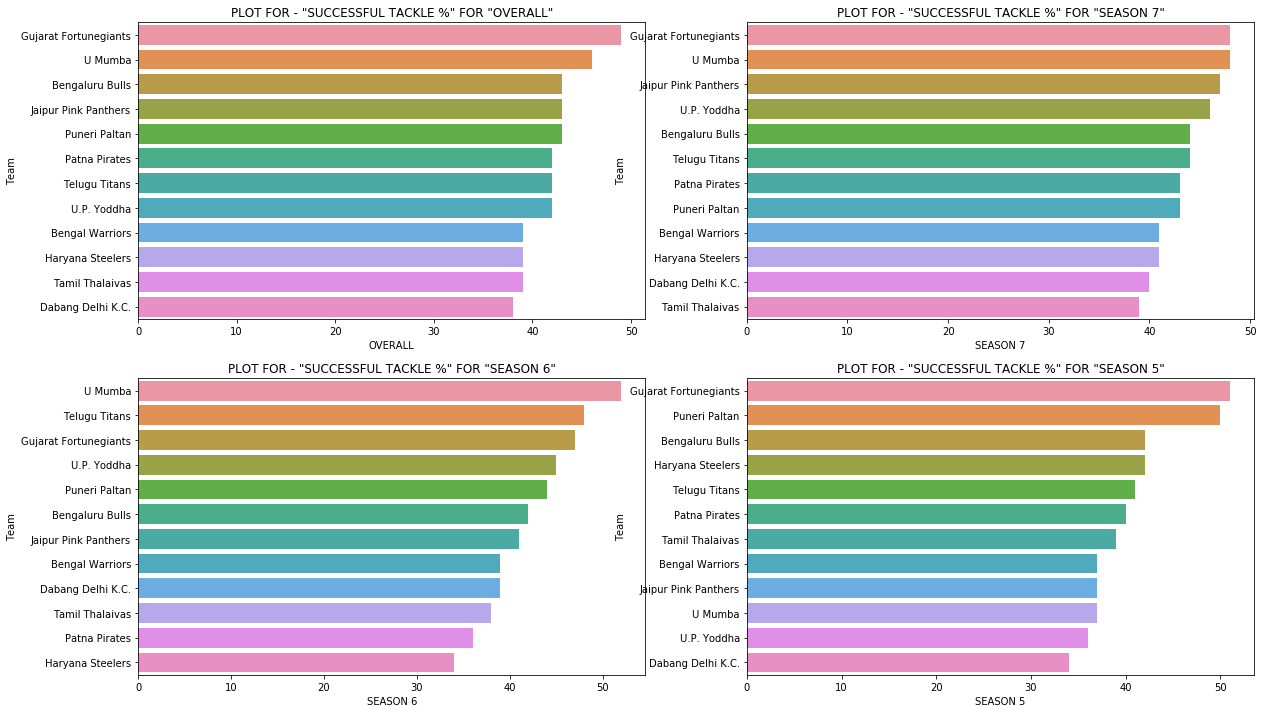

In [37]:
#SUCCESS Tackle % Comparision
plt.figure(figsize = (20, 12))
plt.figure(1)

ax = plt.subplot(221)
plotForGivenParameter_and_season(paramOf_Interest = 'SUCCESSFUL TACKLE %', season = 'OVERALL')
ax = plt.subplot(222)
plotForGivenParameter_and_season(paramOf_Interest = 'SUCCESSFUL TACKLE %', season = 'SEASON 7')
ax = plt.subplot(223)
plotForGivenParameter_and_season(paramOf_Interest = 'SUCCESSFUL TACKLE %', season = 'SEASON 6')
ax = plt.subplot(224)
plotForGivenParameter_and_season(paramOf_Interest = 'SUCCESSFUL TACKLE %', season = 'SEASON 5')

# Task 5: Predict the team with the highest super-performance total. 

In [0]:
# S.P.T. = 
# Total number of super-raids in the tournament + 
# total number of super-tackles in the tournament + 
# total number of all-outs inflicted in the tournament - 
# total number of all-outs conceded in the tournament

In [0]:
allOutData = pd.read_csv('/content/drive/My Drive/InputFiles/KabaddiHackthonInputFiles/AllOutData.csv')

In [0]:
allOutData = allOutData.fillna(0)

In [0]:
allOutData = allOutData.rename(columns = {'Unnamed: 0': 'Team'})

In [42]:
allOutData

,Team,OVERALL,SEASON 7,SEASON 6,SEASON 5,SEASON 4,SEASON 3,SEASON 2,SEASON 1
0,Bengal Warriors,143,16,23.0,29.0,15.0,18.0,17.0,25.0
1,Bengaluru Bulls,146,24,24.0,25.0,21.0,21.0,16.0,15.0
2,Dabang Delhi K.C.,165,15,28.0,35.0,16.0,28.0,20.0,23.0
3,Gujarat Fortunegiants,59,22,0.0,0.0,0.0,0.0,0.0,0.0
4,Haryana Steelers,77,21,33.0,23.0,0.0,0.0,0.0,0.0
5,Jaipur Pink Panthers,145,23,32.0,27.0,14.0,22.0,12.0,15.0
6,Patna Pirates,145,23,30.0,29.0,12.0,13.0,21.0,17.0
7,Puneri Paltan,162,33,29.0,0.0,17.0,13.0,21.0,26.0
8,Tamil Thalaivas,87,29,27.0,31.0,0.0,0.0,0.0,0.0
9,Telugu Titans,132,22,25.0,26.0,13.0,17.0,15.0,14.0


In [0]:
num_cols = ['OVERALL',	'SEASON 1', 'SEASON 2',	'SEASON 3',	'SEASON 4',	'SEASON 5',	'SEASON 6', 'SEASON 7']


In [44]:
dfTeamReport.head()

,Parameter,OVERALL,SEASON 1,SEASON 2,SEASON 3,SEASON 4,SEASON 5,SEASON 6,SEASON 7,Team
0,MATCHES PLAYED,124,14,14,16,14,24,23,19,Bengal Warriors
1,WINS,55,4,4,9,3,11,12,12,Bengal Warriors
2,DRAWS,15,1,1,0,2,6,2,3,Bengal Warriors
3,LOSSES,54,9,9,7,9,7,9,4,Bengal Warriors
4,FINISHING POSITION,0,7,6,4,8,1,2,1,Bengal Warriors


In [45]:
for team in dfTeamReport['Team'].unique():
  rowArray = list()
  rowArray.append('S.P.T')

  for col in num_cols:
    # print(team, "**"*20)
    # print('NO. OF SUPER RAIDS\t\t', dfTeamReport.loc[(dfTeamReport.Team == team) & (dfTeamReport.Parameter == 'NO. OF SUPER RAIDS')][col].get_values()[0])
    # print('NO. OF SUPER TACKLES\t\t', dfTeamReport.loc[(dfTeamReport.Team == team) & (dfTeamReport.Parameter == 'NO. OF SUPER TACKLES')][col].get_values()[0])
    # print('ALL OUTS INFLICTED\t\t', dfTeamReport.loc[(dfTeamReport.Team == team) & (dfTeamReport.Parameter == 'ALL OUTS INFLICTED')][col].get_values()[0])
    # print('ALL OUT CONCEDED\t\t', allOutData.loc[allOutData.Team == team][col].get_values()[0])
    sptValue = dfTeamReport.loc[(dfTeamReport.Team == team) & (dfTeamReport.Parameter == 'NO. OF SUPER RAIDS')][col].get_values()[0] + dfTeamReport.loc[(dfTeamReport.Team == team) & (dfTeamReport.Parameter == 'NO. OF SUPER TACKLES')][col].get_values()[0] + dfTeamReport.loc[(dfTeamReport.Team == team) & (dfTeamReport.Parameter == 'ALL OUTS INFLICTED')][col].get_values()[0] - allOutData.loc[allOutData.Team == team][col].get_values()[0]
    # print('SPT VALUE\t\t', sptValue)
    rowArray.append(sptValue)

  rowArray.append(team)
  dfTeamReport.loc[dfTeamReport.shape[0]] = rowArray
  print('FINAL array to append===>', rowArray)

FINAL array to append===> ['S.P.T', 155, 13.0, 23.0, 16.0, 8.0, 21.0, 32.0, 42, 'Bengal Warriors']
FINAL array to append===> ['S.P.T', 159, 22.0, 26.0, 7.0, 7.0, 25.0, 45.0, 27, 'Bengaluru Bulls']
FINAL array to append===> ['S.P.T', 129, 10.0, 21.0, -1.0, 30.0, 1.0, 38.0, 30, 'Dabang Delhi K.C.']
FINAL array to append===> ['S.P.T', 100, 0.0, 0.0, 0.0, 0.0, 59.0, 64.0, 14, 'Gujarat Fortunegiants']
FINAL array to append===> ['S.P.T', 74, 0.0, 0.0, 0.0, 0.0, 37.0, 10.0, 27, 'Haryana Steelers']
FINAL array to append===> ['S.P.T', 182, 35.0, 28.0, 13.0, 26.0, 18.0, 28.0, 34, 'Jaipur Pink Panthers']
FINAL array to append===> ['S.P.T', 269, 32.0, 9.0, 40.0, 41.0, 79.0, 27.0, 41, 'Patna Pirates']
FINAL array to append===> ['S.P.T', 157, 11.0, 10.0, 34.0, 21.0, 65.0, 26.0, 13, 'Puneri Paltan']
FINAL array to append===> ['S.P.T', 26, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 1, 'Tamil Thalaivas']
FINAL array to append===> ['S.P.T', 181, 27.0, 43.0, 14.0, 21.0, 26.0, 35.0, 15, 'Telugu Titans']
FINAL array 

In [46]:
dfTeamReport.tail()

,Parameter,OVERALL,SEASON 1,SEASON 2,SEASON 3,SEASON 4,SEASON 5,SEASON 6,SEASON 7,Team
271,S.P.T,157,11.0,10.0,34.0,21.0,65.0,26.0,13,Puneri Paltan
272,S.P.T,26,0.0,0.0,0.0,0.0,10.0,15.0,1,Tamil Thalaivas
273,S.P.T,181,27.0,43.0,14.0,21.0,26.0,35.0,15,Telugu Titans
274,S.P.T,195,26.0,29.0,28.0,9.0,21.0,71.0,27,U Mumba
275,S.P.T,82,0.0,0.0,0.0,0.0,33.0,33.0,16,U.P. Yoddha


## S.P.T Comparision

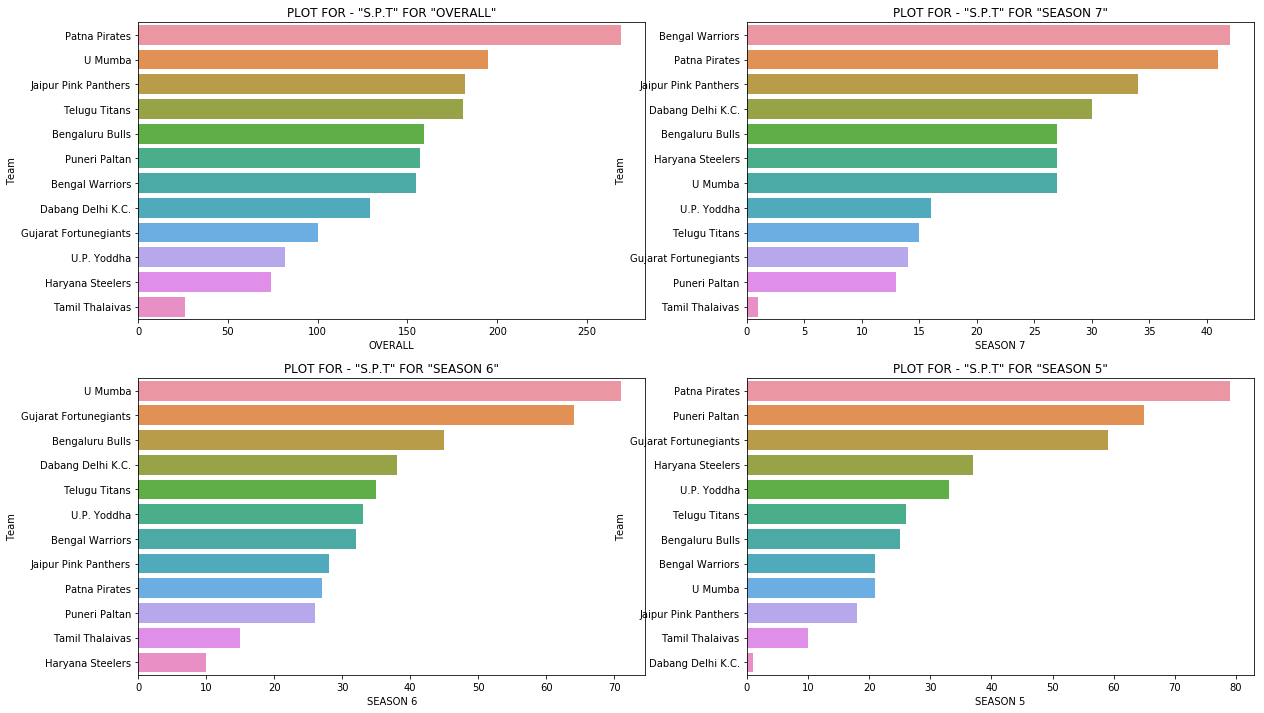

In [47]:
plt.figure(figsize = (20, 12))
plt.figure(1)

ax = plt.subplot(221)
plotForGivenParameter_and_season(paramOf_Interest = 'S.P.T', season = 'OVERALL')
ax = plt.subplot(222)
plotForGivenParameter_and_season(paramOf_Interest = 'S.P.T', season = 'SEASON 7')
ax = plt.subplot(223)
plotForGivenParameter_and_season(paramOf_Interest = 'S.P.T', season = 'SEASON 6')
ax = plt.subplot(224)
plotForGivenParameter_and_season(paramOf_Interest = 'S.P.T', season = 'SEASON 5')

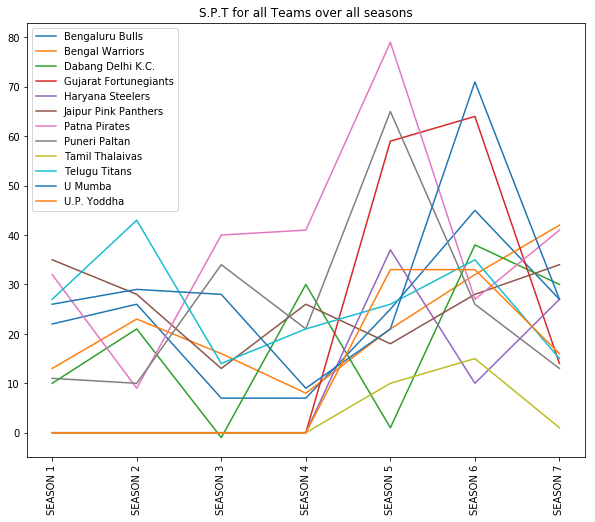

In [48]:
plt.figure(figsize = (10, 8))
plt.title('S.P.T for all Teams over all seasons')

linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengaluru Bulls', paramOfIntrst = 'S.P.T' )
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengal Warriors', paramOfIntrst = 'S.P.T')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Dabang Delhi K.C.', paramOfIntrst = 'S.P.T')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Gujarat Fortunegiants', paramOfIntrst = 'S.P.T')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Haryana Steelers', paramOfIntrst = 'S.P.T')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Jaipur Pink Panthers', paramOfIntrst = 'S.P.T')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Patna Pirates', paramOfIntrst = 'S.P.T')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Puneri Paltan', paramOfIntrst = 'S.P.T')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Tamil Thalaivas', paramOfIntrst = 'S.P.T')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Telugu Titans', paramOfIntrst = 'S.P.T')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U Mumba', paramOfIntrst = 'S.P.T')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U.P. Yoddha', paramOfIntrst = 'S.P.T')

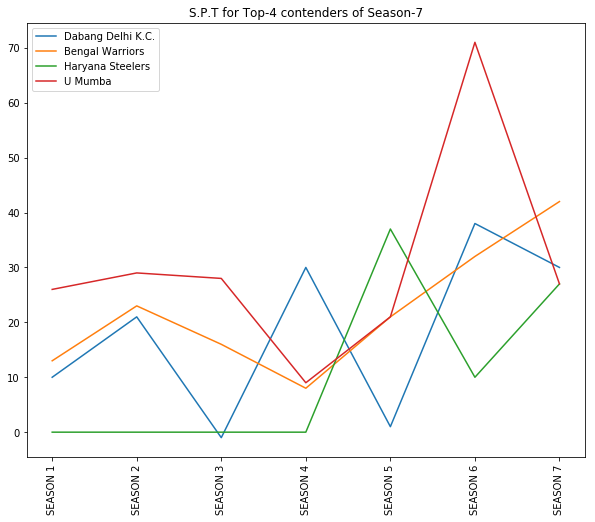

In [49]:
# Plotting for Top 4 Contenders in Season - 7
plt.figure(figsize = (10, 8))
plt.title('S.P.T for Top-4 contenders of Season-7')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Dabang Delhi K.C.', paramOfIntrst = 'S.P.T')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengal Warriors', paramOfIntrst = 'S.P.T')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Haryana Steelers', paramOfIntrst = 'S.P.T')
linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U Mumba', paramOfIntrst = 'S.P.T')

# linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Bengaluru Bulls', paramOfIntrst = 'S.P.T' )
# linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Gujarat Fortunegiants', paramOfIntrst = 'S.P.T')
# linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Jaipur Pink Panthers', paramOfIntrst = 'S.P.T')
# linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Patna Pirates', paramOfIntrst = 'S.P.T')
# linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Puneri Paltan', paramOfIntrst = 'S.P.T')
# linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Tamil Thalaivas', paramOfIntrst = 'S.P.T')
# linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'Telugu Titans', paramOfIntrst = 'S.P.T')
# linePlotForGivenTeam_for_given_parameter_forAllSeasons(teamName = 'U.P. Yoddha', paramOfIntrst = 'S.P.T')

In [50]:
# dfTeamReport.loc[dfTeamReport.Parameter == 'S.P.T'].sort_values(by = 'OVERALL', ascending = False)
dfTeamReport.loc[dfTeamReport.Team == 'Gujarat Fortunegiants']

,Parameter,OVERALL,SEASON 1,SEASON 2,SEASON 3,SEASON 4,SEASON 5,SEASON 6,SEASON 7,Team
66,MATCHES PLAYED,67,0.0,0.0,0.0,0.0,24.0,25.0,18,Gujarat Fortunegiants
67,WINS,39,0.0,0.0,0.0,0.0,16.0,18.0,5,Gujarat Fortunegiants
68,DRAWS,7,0.0,0.0,0.0,0.0,3.0,2.0,2,Gujarat Fortunegiants
69,LOSSES,21,0.0,0.0,0.0,0.0,5.0,5.0,11,Gujarat Fortunegiants
70,FINISHING POSITION,0,0.0,0.0,0.0,0.0,1.0,1.0,9,Gujarat Fortunegiants
71,TOTAL RAIDS,2858,0.0,0.0,0.0,0.0,1055.0,1072.0,731,Gujarat Fortunegiants
72,SUCCESSFUL RAIDS,953,0.0,0.0,0.0,0.0,335.0,392.0,226,Gujarat Fortunegiants
73,UNSUCCESSFUL RAID,657,0.0,0.0,0.0,0.0,211.0,246.0,200,Gujarat Fortunegiants
74,EMPTY RAIDS,1248,0.0,0.0,0.0,0.0,509.0,434.0,305,Gujarat Fortunegiants
75,SUCCESS RAID %,41,0.0,0.0,0.0,0.0,38.0,45.0,38,Gujarat Fortunegiants


# Task 6: Predict the player with the highest SUCCESSFUL RAID percentage.

In [51]:
# Team Player Consolidated File Available at:
# /content/drive/My Drive/InputFiles/KabaddiHackthonInputFiles/teamPlayerConsolidatedReport.csv

df_succ_raid=pd.read_csv(r'/content/drive/My Drive/InputFiles/KabaddiHackthonInputFiles/teamPlayerConsolidatedReport.csv')
df_succ_raid.rename(columns={'Unnamed: 0': 'Parameters'}, inplace = True)
df_succ_raid.dtypes

Parameters     object
OVERALL        object
Player Name    object
SEASON 1       object
SEASON 2       object
SEASON 3       object
SEASON 4       object
SEASON 5       object
SEASON 6       object
SEASON 7       object
Team           object
dtype: object

In [0]:
cols = df_succ_raid.columns.drop(['Parameters','Player Name','Team'])
df_succ_raid[cols] = df_succ_raid[cols].apply(pd.to_numeric, errors='coerce')

#% of null values
# print(round((((df_raid.isnull().sum())/len(df_raid))*100),2))
df_succ_raid.dtypes
df_succ_raid=df_succ_raid.fillna(0)

In [53]:
df_succf=df_succ_raid[df_succ_raid['Parameters'].isin(['SUCCESSFUL RAIDS %'])]
# df_succf.drop_duplicates('Player Name', inplace=True)
df_succf.head()

,Parameters,OVERALL,Player Name,SEASON 1,SEASON 2,SEASON 3,SEASON 4,SEASON 5,SEASON 6,SEASON 7,Team
5,SUCCESSFUL RAIDS %,58.66,maninder-singh,74.28,0.00,0.00,0.00,51.77,54.78,62.74,Bengal Warriors
21,SUCCESSFUL RAIDS %,44.26,k--prapanjan,0.00,35.71,33.33,28.57,40.19,47.84,50.25,Bengal Warriors
37,SUCCESSFUL RAIDS %,0.00,mohammad-taghi,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Bengal Warriors
53,SUCCESSFUL RAIDS %,39.37,rakesh-narwal,0.00,43.75,0.00,0.00,30.35,52.94,150.00,Bengal Warriors
69,SUCCESSFUL RAIDS %,37.16,ravindra-kumawat,0.00,0.00,0.00,25.00,28.57,40.65,14.28,Bengal Warriors


In [54]:
df_matches_plyed=df_succ_raid[df_succ_raid['Parameters'].isin(['MATCHES PLAYED'])]
df_succ_raid.drop_duplicates('Player Name', inplace=True)
df_matches_plyed.head()

,Parameters,OVERALL,Player Name,SEASON 1,SEASON 2,SEASON 3,SEASON 4,SEASON 5,SEASON 6,SEASON 7,Team
0,MATCHES PLAYED,78.0,maninder-singh,16.0,0.0,0.0,0.0,21.0,22.0,19.0,Bengal Warriors
16,MATCHES PLAYED,81.0,k--prapanjan,0.0,4.0,4.0,11.0,22.0,22.0,18.0,Bengal Warriors
32,MATCHES PLAYED,3.0,mohammad-taghi,0.0,0.0,0.0,0.0,0.0,0.0,3.0,Bengal Warriors
48,MATCHES PLAYED,25.0,rakesh-narwal,0.0,11.0,1.0,0.0,6.0,6.0,1.0,Bengal Warriors
64,MATCHES PLAYED,18.0,ravindra-kumawat,0.0,0.0,0.0,2.0,2.0,12.0,2.0,Bengal Warriors


In [55]:
df_succf=df_succf.loc[:,['OVERALL','Player Name','SEASON 7','Team']]
df_matches_plyed=df_matches_plyed.loc[:,['OVERALL','Player Name','SEASON 7','Team']]
df_succf.nlargest(5, columns=['OVERALL','SEASON 7'])

df_matches_plyed.nlargest(10, columns=['OVERALL','SEASON 7'])

,OVERALL,Player Name,SEASON 7,Team
928,118.0,rahul-chaudhari,18.0,Tamil Thalaivas
1744,118.0,sandeep-narwal,17.0,U Mumba
1152,116.0,ran-singh,17.0,Tamil Thalaivas
1856,116.0,rishank-devadiga,13.0,U.P. Yoddha
896,115.0,ajay-thakur,13.0,Tamil Thalaivas
144,111.0,jeeva-kumar,18.0,Bengal Warriors
1072,108.0,mohit-chhillar,17.0,Tamil Thalaivas
1136,108.0,manjeet-chhillar,15.0,Tamil Thalaivas
320,104.0,pardeep-narwal,19.0,Patna Pirates
848,103.0,girish-maruti-ernak,14.0,Puneri Paltan


In [56]:
df_succ_raids_consol=pd.merge(df_succf,df_matches_plyed, on='Player Name')
df_succ_raids_consol.columns = ['Overall_Succ_Raid %', 'Player Name','SEASON 7_Succ_Raid %','Team_x','Overall_Matches_plyed', 'SEASON 7_Matches_plyed','Team_y']
df_succf_raids_consol=df_succ_raids_consol.drop(['Team_x','Team_y'],axis=1, inplace=True)


df_O= df_succ_raids_consol.nlargest(12,columns=['Overall_Succ_Raid %'])

df_M=df_succ_raids_consol.nlargest(12,columns=['SEASON 7_Succ_Raid %'])

df_o_M=df_succ_raids_consol.nlargest(10,columns=['Overall_Matches_plyed'])

df_s_M=df_succ_raids_consol.nlargest(10,columns=['SEASON 7_Matches_plyed'])
df_O

,Overall_Succ_Raid %,Player Name,SEASON 7_Succ_Raid %,Overall_Matches_plyed,SEASON 7_Matches_plyed
14,200.00,adarsh-t,0.00,19.0,9.0
120,100.00,ankush,100.00,3.0,3.0
83,80.00,victor-obiero,75.00,6.0,3.0
65,77.77,sandeep,0.00,5.0,0.0
123,75.00,masud-karim,0.00,3.0,0.0
91,64.45,siddharth-desai,60.07,38.0,17.0
36,62.50,amit-kumar,62.50,3.0,3.0
37,62.50,amit-kumar,62.50,5.0,5.0
38,62.50,amit-kumar,62.50,11.0,9.0
70,59.73,v--ajith-kumar,59.73,15.0,15.0


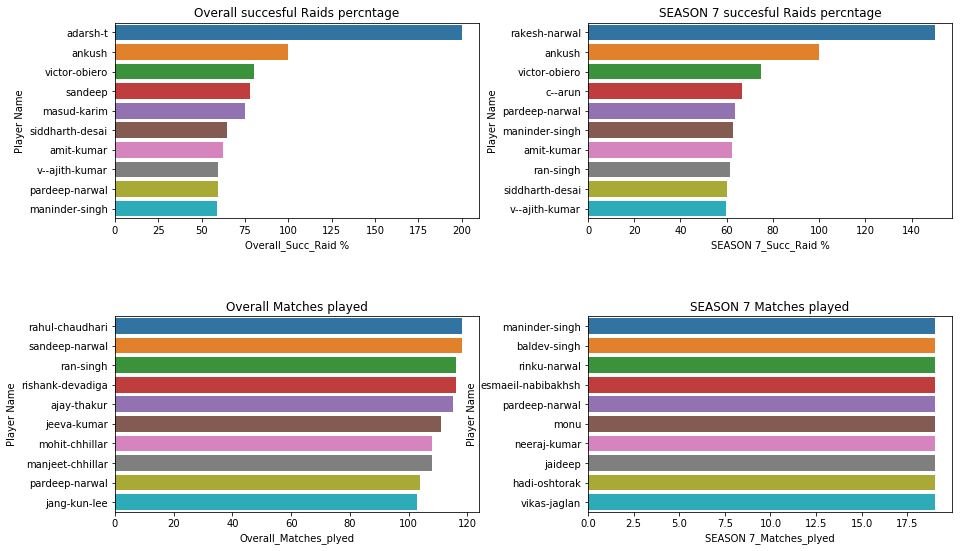

In [57]:
plt.figure(figsize=(15,9))

plt.subplot(2,2,1)
plt.subplots_adjust(wspace=0.3)
plt.title('Overall succesful Raids percntage')
sns.barplot(y=df_O['Player Name'],x=df_O['Overall_Succ_Raid %'])

plt.subplot(2,2,2)
plt.subplots_adjust(hspace=0.5)
plt.title('SEASON 7 succesful Raids percntage')
sns.barplot(y=df_M['Player Name'],x=df_M['SEASON 7_Succ_Raid %'])


plt.subplot(2,2,3)
plt.title('Overall Matches played')
sns.barplot(y=df_o_M['Player Name'],x=df_o_M['Overall_Matches_plyed'])

plt.subplot(2,2,4)
plt.title('SEASON 7 Matches played')
sns.barplot(y=df_s_M['Player Name'],x=df_s_M['SEASON 7_Matches_plyed'])

plt.show()

## From the above graph we can analyze the below insights:

1. Overall Succesful raid % for player without considering Overall Matches played 'Adarsh' is higest.
2. Overall Succesful raid % for player considering Overall Matches played and Overall Succesful raid %  'Pardeep Narwal' is higest.
3. Season-7 Succesful raid % for player 'Rakkesh narawal' from Bengal Warriors is higest.
4. Season-7 Succesful raid % for player considering season-7 most no matches played is Pradeep narwaal

### In a very simple terms, it is predicted that Season-7 Successful Ride % player is *Rakesh-Narwal* from Bengal Warriors 

# Task 7: Predict the player with the highest SUCCESSFUL TACKLE percentage.

In [58]:
# Team Player Consolidated File Available at:
# /content/drive/My Drive/InputFiles/KabaddiHackthonInputFiles/teamPlayerConsolidatedReport.csv

df_succ_tackle=pd.read_csv(r'/content/drive/My Drive/InputFiles/KabaddiHackthonInputFiles/teamPlayerConsolidatedReport.csv')
df_succ_tackle.rename(columns={'Unnamed: 0': 'Parameters'}, inplace = True)
df_succ_tackle.head()

,Parameters,OVERALL,Player Name,SEASON 1,SEASON 2,SEASON 3,SEASON 4,SEASON 5,SEASON 6,SEASON 7,Team
0,MATCHES PLAYED,78,maninder-singh,16,0,NaN,NaN,21,22,19,Bengal Warriors
1,TOTAL POINTS EARNED,727,maninder-singh,137,0,NaN,NaN,192,206,192,Bengal Warriors
2,MOST POINTS IN A MATCH,19,maninder-singh,13,0,NaN,NaN,17,17,19,Bengal Warriors
3,NOT OUT %,80.39 %,maninder-singh,76 %,0,NaN,NaN,82.01 %,79.52 %,82.02 %,Bengal Warriors
4,TOTAL RAIDS,1224,maninder-singh,175,0,NaN,NaN,367,376,306,Bengal Warriors


In [59]:
x=['OVERALL','SEASON 1','SEASON 2','SEASON 3','SEASON 4','SEASON 5','SEASON 6','SEASON 7']
for i in x:
    df_succ_tackle[i]=df_succ_tackle[i].str.split('%', expand=True)
df_succ_tackle=df_succ_tackle.fillna(0)

cols = df_succ_tackle.columns.drop(['Parameters','Player Name','Team'])
df_succ_tackle[cols] = df_succ_tackle[cols].apply(pd.to_numeric, errors='coerce')


df_succ_tackle.head()

,Parameters,OVERALL,Player Name,SEASON 1,SEASON 2,SEASON 3,SEASON 4,SEASON 5,SEASON 6,SEASON 7,Team
0,MATCHES PLAYED,78.00,maninder-singh,16.0,0.0,0.0,0.0,21.00,22.00,19.00,Bengal Warriors
1,TOTAL POINTS EARNED,727.00,maninder-singh,137.0,0.0,0.0,0.0,192.00,206.00,192.00,Bengal Warriors
2,MOST POINTS IN A MATCH,19.00,maninder-singh,13.0,0.0,0.0,0.0,17.00,17.00,19.00,Bengal Warriors
3,NOT OUT %,80.39,maninder-singh,76.0,0.0,0.0,0.0,82.01,79.52,82.02,Bengal Warriors
4,TOTAL RAIDS,1224.00,maninder-singh,175.0,0.0,0.0,0.0,367.00,376.00,306.00,Bengal Warriors


In [60]:
df_tackle=df_succ_tackle[df_succ_tackle['Parameters'].isin(['TACKLE STRIKE RATE'])]
df_tackle.head()

,Parameters,OVERALL,Player Name,SEASON 1,SEASON 2,SEASON 3,SEASON 4,SEASON 5,SEASON 6,SEASON 7,Team
15,TACKLE STRIKE RATE,20.45,maninder-singh,36.84,0.0,0.0,0.0,15.38,0.00,0.00,Bengal Warriors
31,TACKLE STRIKE RATE,12.00,k--prapanjan,0.00,40.0,0.0,0.0,5.88,9.09,14.28,Bengal Warriors
47,TACKLE STRIKE RATE,25.00,mohammad-taghi,0.00,0.0,0.0,0.0,0.00,0.00,25.00,Bengal Warriors
63,TACKLE STRIKE RATE,15.38,rakesh-narwal,0.00,0.0,0.0,0.0,33.33,33.33,0.00,Bengal Warriors
79,TACKLE STRIKE RATE,33.33,ravindra-kumawat,0.00,0.0,0.0,100.0,0.00,27.77,100.00,Bengal Warriors


In [61]:
# col=['Parameters','OVERALL','Player Name']
df_tackle=df_tackle.loc[:,['Parameters','OVERALL','Player Name','SEASON 7','Team']]
df_tackle.head()
df_tackle.nlargest(10, columns='OVERALL')

,Parameters,OVERALL,Player Name,SEASON 7,Team
639,TACKLE STRIKE RATE,100.00,amit-kumar,100.00,Puneri Paltan
1791,TACKLE STRIKE RATE,100.00,ankush,100.00,U.P. Yoddha
1903,TACKLE STRIKE RATE,66.66,surender-gill,66.66,U.P. Yoddha
2015,TACKLE STRIKE RATE,66.66,gurdeep,66.66,U.P. Yoddha
1487,TACKLE STRIKE RATE,64.15,fazel-atrachali,59.78,U Mumba
1775,TACKLE STRIKE RATE,59.37,nitesh-kumar,57.33,U.P. Yoddha
1439,TACKLE STRIKE RATE,56.48,vishal-bhardwaj,59.00,Telugu Titans
415,TACKLE STRIKE RATE,56.30,monu,59.52,Patna Pirates
1983,TACKLE STRIKE RATE,54.71,sumit,54.71,U.P. Yoddha
1759,TACKLE STRIKE RATE,54.64,sandeep-narwal,61.53,U Mumba


In [62]:
df_tackle_pts=df_succ_tackle[df_succ_tackle['Parameters'].isin(['TOTAL TACKLE POINTS'])]
df_tackle_pts.head()

df_tackle_pts=df_tackle_pts.loc[:,['Parameters','OVERALL','Player Name','SEASON 7','Team']]
df_tackle_pts.nlargest(10, columns='OVERALL')

,Parameters,OVERALL,Player Name,SEASON 7,Team
1148,TOTAL TACKLE POINTS,339.0,manjeet-chhillar,37.0,Tamil Thalaivas
1756,TOTAL TACKLE POINTS,294.0,sandeep-narwal,40.0,U Mumba
1484,TOTAL TACKLE POINTS,290.0,fazel-atrachali,55.0,U Mumba
1084,TOTAL TACKLE POINTS,277.0,mohit-chhillar,37.0,Tamil Thalaivas
620,TOTAL TACKLE POINTS,266.0,surjeet-singh,51.0,Puneri Paltan
860,TOTAL TACKLE POINTS,259.0,girish-maruti-ernak,31.0,Puneri Paltan
156,TOTAL TACKLE POINTS,226.0,jeeva-kumar,31.0,Bengal Warriors
1164,TOTAL TACKLE POINTS,226.0,ran-singh,27.0,Tamil Thalaivas
1436,TOTAL TACKLE POINTS,196.0,vishal-bhardwaj,59.0,Telugu Titans
1772,TOTAL TACKLE POINTS,190.0,nitesh-kumar,43.0,U.P. Yoddha


In [65]:
df_ts= df_tackle.nlargest(10, columns='OVERALL')
df_tsS= df_tackle.nlargest(10, columns='SEASON 7')
df_tp= df_tackle_pts.nlargest(10, columns='OVERALL')
df_tpS= df_tackle_pts.nlargest(10, columns='SEASON 7')

df_tpS
df_tsS

,Parameters,OVERALL,Player Name,SEASON 7,Team
79,TACKLE STRIKE RATE,33.33,ravindra-kumawat,100.00,Bengal Warriors
639,TACKLE STRIKE RATE,100.00,amit-kumar,100.00,Puneri Paltan
1791,TACKLE STRIKE RATE,100.00,ankush,100.00,U.P. Yoddha
1903,TACKLE STRIKE RATE,66.66,surender-gill,66.66,U.P. Yoddha
2015,TACKLE STRIKE RATE,66.66,gurdeep,66.66,U.P. Yoddha
1759,TACKLE STRIKE RATE,54.64,sandeep-narwal,61.53,U Mumba
1487,TACKLE STRIKE RATE,64.15,fazel-atrachali,59.78,U Mumba
415,TACKLE STRIKE RATE,56.30,monu,59.52,Patna Pirates
1439,TACKLE STRIKE RATE,56.48,vishal-bhardwaj,59.00,Telugu Titans
1775,TACKLE STRIKE RATE,59.37,nitesh-kumar,57.33,U.P. Yoddha


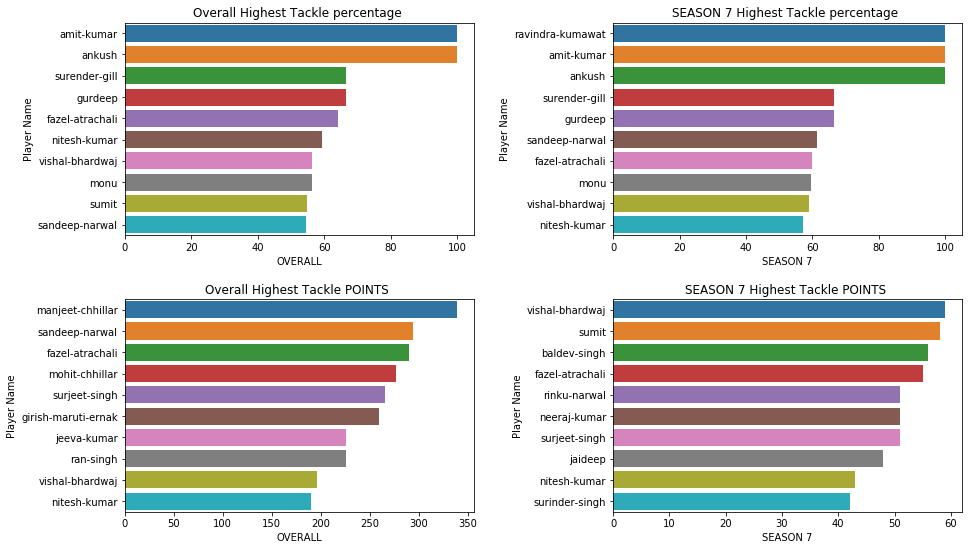

In [64]:
plt.figure(figsize=(15,9))
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.4)

plt.subplot(2,2,1)
plt.title('Overall Highest Tackle percentage ')
sns.barplot(x=df_ts['OVERALL'], y=df_ts['Player Name'])

plt.subplot(2,2,2)
plt.title('SEASON 7 Highest Tackle percentage ')
sns.barplot(x=df_tsS['SEASON 7'], y=df_tsS['Player Name'])

plt.subplot(2,2,3)
plt.title('Overall Highest Tackle POINTS ')
sns.barplot(x=df_tp['OVERALL'], y=df_tp['Player Name'])

plt.subplot(2,2,4)
plt.title('SEASON 7 Highest Tackle POINTS ')
sns.barplot(x=df_tpS['SEASON 7'], y=df_tpS['Player Name'])

plt.show()

## From the above plots we can analyze the below insights:
1.Overall Successful tackle % is highest for 'Amit-Kumar' and 'Anushk‘ ; Match points are low; NOT top contenders.
2.Overall Highest tackle POINTS is highest for 'Manjeet Chillar' and 'Sandeep-Narwal'. Season 7 match points are low, NOT top contenders in Season 7.
3.Season-7 tackle PTS :high for 'Vishal Bhardwaj' and 'Sumit'.Overall match pts are low, NOT top contenders for season 7. 

To conclude, if 'Vishal Bhardwaj' and 'Fazel atrachali' seems top two contenders with overall and Season 7 tackle points, and percentage. 
**Between these two ‘VISHAL BHARADWAJ' from Telugu Titans CAN BE predicted as having highest tackle percentage**